## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv('ab_data.csv') # import csv file  

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

In [4]:
df 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


c. The number of unique users in the dataset.

In [5]:
df['user_id'].value_counts()

637561    2
821876    2
643869    2
938802    2
916765    2
690255    2
737500    2
680018    2
853835    2
736746    2
722827    2
904340    2
757485    2
863300    2
905507    2
902109    2
782432    2
644294    2
899374    2
881704    2
656951    2
869729    2
720460    2
889529    2
812376    2
846972    2
776770    2
859842    2
844475    2
848746    2
         ..
874753    1
868610    1
870659    1
880900    1
876806    1
669933    1
878855    1
856328    1
858377    1
852234    1
854283    1
864524    1
696574    1
702717    1
700668    1
690427    1
688378    1
694521    1
692472    1
714999    1
712950    1
719093    1
717044    1
706803    1
704754    1
710897    1
708848    1
665839    1
663790    1
630836    1
Name: user_id, Length: 290584, dtype: int64

In [6]:
user=df['user_id'].nunique()
user

290584

d. The proportion of users converted.

In [7]:
converted=(df.query('converted == 1')['user_id'].nunique())
con1=(converted/294478)
con2= "{0:.2%}".format(con1)
con2

'11.94%'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


e. The number of times the `new_page` and `treatment` don't match.

In [9]:
treold = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
connew = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]
total=treold.count()+connew.count()
total
# Add lengths

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [10]:
df.isnull().values.any() 

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.query("group == 'control' and landing_page == 'old_page'")
df2 = df2.append(df.query("group == 'treatment' and landing_page == 'new_page'"))

In [12]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]
df2.shape[0]
# For rows where treatment group and new landing page are alig, its will drop rows where new landing page & contro


290585

In [13]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
user1=df2['user_id'].nunique()
user1

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
len(df2)-len(df2.user_id.unique()) #The overall values subtracted from the unique values

1

In [17]:
df2[df2.duplicated(['user_id'])]['user_id']#User_id 773192 is repeated

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2.drop(index =2893,inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
ConvertU=df2.converted.mean()# i used mesn()to show the converted probability of user between 0,1
ConvertU

0.11959708724499628

In [22]:

print("{0:.2%}".format(ConvertU))

11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
GroupC=df2[df2['group']=='control']['converted'].mean() #I took the control from group column and I took all the values from converted Column, calculated the mean of them
GroupC

0.1203863045004612

In [24]:
print("{0:.2%}".format(GroupC))

12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
GroupT=df2[df2['group']=='treatment']['converted'].mean() # I took the treatment from group column and I took all the values from converted Column, calculated the mean of them  
GroupT

0.11880806551510564

In [26]:
print("{0:.2%}".format(GroupT))

11.88%


d. What is the probability that an individual received the new page?

In [27]:
Ledf2=len(df2)
NeP=df2['landing_page'].value_counts()[0]/Ledf2
NeP
#I counted the users who received a new page and divided it up by all users

0.50006194422266881

In [28]:
print("{0:.2%}".format(NeP)) 

50.01%


The Probability of receiving a new page is 50.01%

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.


Probability of an individual converting regardless of the page they receive 11.96%
The probability converted withe individual control group is 12.04%
The probability converted withe individual treatment group is 11.88%
The Probability of receiving a new page is 50.01%

As is evident from the data, the conversion rate is equal on both pages

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Alternative Hypotheses :
1. P𝑛𝑒𝑤 - P𝑜𝑙𝑑 > 0  
Numll Hypotheses: 
1. P𝑛𝑒𝑤 - P𝑜𝑙𝑑 <= 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [29]:
𝑝𝑛𝑒𝑤= df2.query('converted == 1').shape[0]/ df2.shape[0]
𝑝𝑛𝑒𝑤

0.11959708724499628

In [30]:
print("{0:.2%}".format(𝑝𝑛𝑒𝑤)) 

11.96%


The conversion rate for PNew under the null is 11.96% 

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [31]:
𝑝𝑜𝑙𝑑= df2.query('converted == 1').shape[0]/ df2.shape[0]
𝑝𝑜𝑙𝑑

0.11959708724499628

In [32]:
print("{0:.2%}".format(𝑝𝑜𝑙𝑑))

11.96%


Probability of conversion given new page under the null 12.04%

c. What is $n_{new}$, the number of individuals in the treatment group?

In [33]:
n_new = df2.query("landing_page == 'new_page'")['converted'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [34]:
n_old = df2.query("landing_page == 'old_page'")['converted'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [35]:
New_Page_Converted = np.random.choice(2, n_new, replace = True, p=[(1-𝑝𝑛𝑒𝑤), 𝑝𝑛𝑒𝑤])
New_Page_Converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [36]:
Old_Page_Converted = np.random.choice(2, n_old, replace = True, p=[(1-𝑝𝑜𝑙𝑑), 𝑝𝑜𝑙𝑑])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [37]:
NPC=New_Page_Converted.mean()
NPC

0.12028766086298259

In [38]:
OPC=Old_Page_Converted.mean()
OPC

0.12011784627669095

In [39]:
Thediff=NPC - OPC# doifferences computed in from p_new and p_old
Thediff

0.00016981458629164448

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [40]:
p_diffs = []
for _ in range(10000):
    New_Page_Converted = np.random.choice(2, n_new, replace = True, p=[(1-𝑝𝑛𝑒𝑤), 𝑝𝑛𝑒𝑤])
    Old_Page_Converted = np.random.choice(2, n_old, replace = True, p=[(1-𝑝𝑜𝑙𝑑), 𝑝𝑜𝑙𝑑])
    NPC=New_Page_Converted.mean()
    OPC=Old_Page_Converted.mean()
    p_diffs.append(NPC-OPC)
    #I use loop to create a sampling distribution with binomials


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

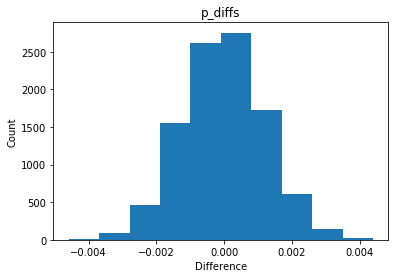

In [41]:
plt.hist(p_diffs)
plt.title('p_diffs')
plt.ylabel('Count')
plt.xlabel('Difference') 
plt.show()

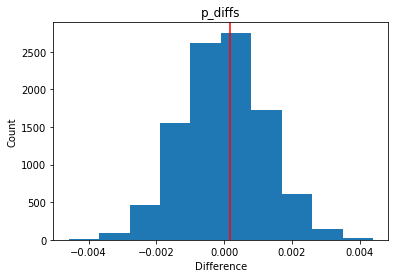

In [42]:
plt.hist(p_diffs);
plt.title('p_diffs')
plt.ylabel('Count')
plt.xlabel('Difference') 
plt.axvline(x= Thediff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [43]:
ProP_diff=(df2.query('group == "treatment" & converted == 1').shape[0]/df2.query('group == "treatment"').shape[0])- \
(df2.query('group == "control" & converted == 1').shape[0] /df2.query('group == "control"').shape[0])
ProP_diff

-0.0015782389853555567

In [44]:
(np.array(p_diffs)>ProP_diff).mean() 

0.90300000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Based on the results,The value calculated is called p-value, conversion includes all pages and does not matter which page the user receives The users in the control group are more converted than treatment a group, but the difference between them is not too much, and in my opinion, it does not affect 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
import statsmodels.api as sm
convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])
n_old = len(df2[(df2['landing_page']=='old_page')])
n_new = len(df2[(df2['landing_page']=='new_page')])
convert_old,convert_new,n_old,n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [67]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value
#display z_score and p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

I am still seeing the same results that I had previously, despite my use of the zero theory, 
there is no difference, so I am confirming now that the old page is the most worth using and the most useful 
Statistical conclusion: 
1.z_score is less than critical value of 95% confidence. 
2 .accept null hypothesis.
z-score and p-value the old and new page conversion rates are not statistically different with each other  

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

 Logistic Regression is used when the dependent variable(target) is categorical.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
df2['intercept'] = 1 # create intercept colman

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [49]:
import statsmodels.api as s

In [50]:

SMD = s.Logit(df2['converted'], df2[['intercept','ab_page']])

In [51]:
disP=SMD.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [52]:
disP.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-23 06:51 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

ab_page = 0.190 , no different between treatment and control group on c & e prat null but there is a different between treatment and control group on Alternative, in Part II the old page is better Based on previous results , null hypothesis is  ab_page = 1, converted = 0; the alternative hypothesis ab_page = 1, converted is more likely to be 1. 
 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is very natural that factors affect the results, but the challenge lies in choosing this factor. Also, I do not know the effect of this factor in any direction, and often the factor is affected based on another factor

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [53]:
c = pd.read_csv('countries.csv')
c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [54]:
NewJ= c.set_index('user_id').join(df2.set_index('user_id'))

In [55]:
NewJ['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [56]:
NewJ.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1


In [57]:
NewJ[['US', 'UK']] = pd.get_dummies(NewJ['country'])[['US', "UK"]]
NewJ.head()
#Create the dummy variables

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,US,UK
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,1


In [58]:
NewJ['US_ab_page'] = NewJ['US']*NewJ['ab_page']
NewJ.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,US,UK,US_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,1,0


In [59]:
NewJ['UK_ab_page'] = NewJ['UK']*NewJ['ab_page']
NewJ.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,1,0,1


In [60]:
 SMD2 =s.Logit(NewJ['converted'], NewJ[['intercept', 'US', 'UK']]);
   
# drop US 

In [61]:
disP2=SMD2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [62]:
disP2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-23 06:51 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

In [79]:
us=0.0408
uk=0.0507
print("{0:.2%}".format(us))
print("{0:.2%}".format(uk))

4.08%
5.07%


US convert is 4.08% more to happen, holding all other varible constant.

UK convert is 5.07% more to happen, holding all other varible constant.

Based on the results, the country has no effect on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [63]:
NewJ['UK_page'] = NewJ['UK']*NewJ['ab_page']
NewJ['US_page'] = NewJ['US']*NewJ['ab_page']
SMD3 = s.Logit(NewJ['converted'],NewJ[['intercept','US_page', 'UK_page']])

In [64]:
disP3 = SMD3.fit()
disP3.summary2()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-23 06:51 AIC:              212781.7674
No. Observations:   290584           BIC:              212813.5064
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
US_page      -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
UK_page       0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
==================================================================

"""

ab_page (p = 0.046; p < 0.05)

Through the results, I see that the values are greater than the critical value, so we have no evidence to reject the null hypothesis, my conclusion is that there is no reason to switch the new page as long as the old page is working ,when ab_page and country they are not equal importance it is unlikely to be of any real use to us It is certainly not important to us

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0